## <center> Prova [02] - Inteligência Artificial / UFPB - 2021.2 </center>
**Discente:** Lucas Gomes Dantas <br>
**Matrícula:** 20200082925 <br>
**Dataset:** <a href="https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation">Higher Education Students Performance Evaluation</a>


***

> **[*] Ambiente e Dependências**

In [10]:
from statistics import mode

import pickle
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import DataFrame

from warnings import simplefilter

from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, classification_report, accuracy_score, ConfusionMatrixDisplay

from imblearn.over_sampling import KMeansSMOTE

from autosklearn.classification import AutoSklearnClassifier

simplefilter("ignore")
warnings.filterwarnings("ignore")


**1 -** Utilizando a base de dados de <a href="https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation">Higher Education Students Performance Evaluation</a>, elabore uma solução para identificar o OUTPUT Grade do estudante.  <br>


> **[#] Dataset**

In [11]:
dstudent = pd.read_csv('student_prediction.csv')
dstudent.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


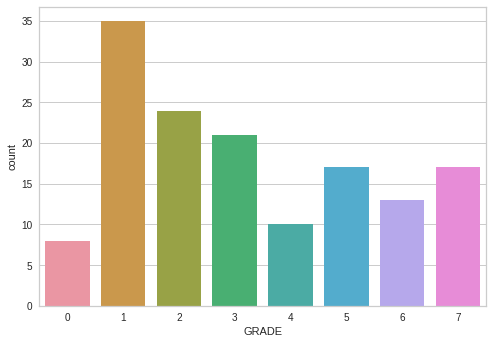

In [12]:
graphstd = sns.countplot(dstudent['GRADE'], label = 'Count')
plt.show()

> **1 [A]** - Faça o pré-processamento dos dados (limpeza, engenharia de variáveis, etc) e deixe os seus dados preparados para aplicar o modelo.<br>

> **1 [A - a]** Utilize pelo menos uma forma de redimensionamento de atributos (selecionando ou agregando) e avalie o resultado de utilizar todas eles e essa amostra.


>> **[#] Pré-processamento**

In [13]:
dstudent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

>> Todos os dados são numéricos, então não há necessidade de conversão.

In [14]:
dstudent.shape

(145, 33)

In [15]:
dstudent.describe(include=object)

,STUDENTID
count,145
unique,145
top,STUDENT1
freq,1


>>> Apresenta a disposição dos dados para os atributos do tipo object e sua incidência de valores e singularidade.

In [16]:
dstudent = dstudent.drop(['STUDENTID', 'COURSE ID'], axis = 1)

>>> Removendo atributos de ID, pois é irrelevante ao contexto.

In [17]:
dstudent = dstudent.drop_duplicates()
dstudent = dstudent.dropna()

>>> Removendos dados duplicados e nulos.

In [18]:
double = dstudent[dstudent.duplicated()]
double

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE


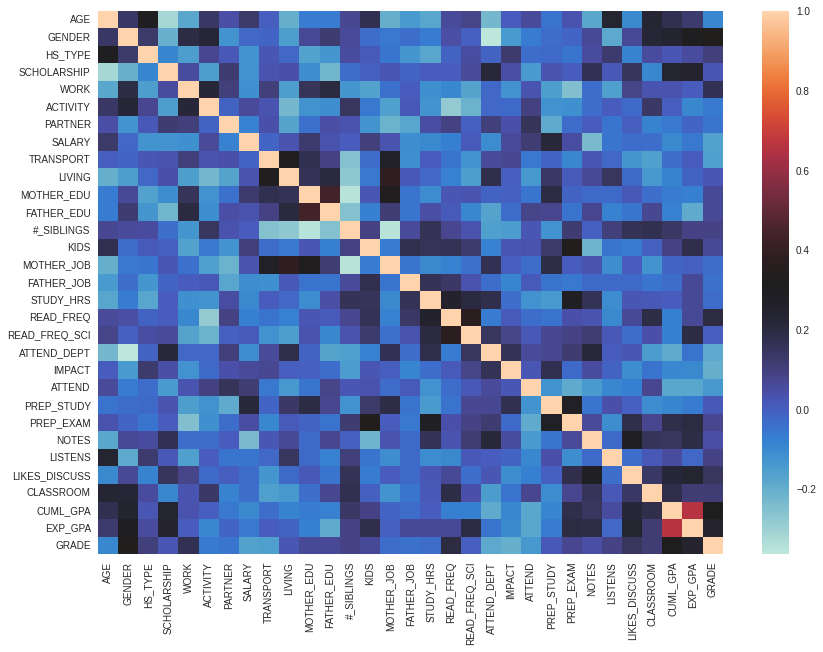

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(dstudent.corr(), cmap = "icefire")
plt.show()

>>> Ao avaliar o gráfico é possível identificar uma incidência maior de correlação entre "EXP_GPA" em relação ao "CUML_GPA". <br>

>>> Após alguns testes foi possível identificar que há um impacto considerável na remoção de um desses atributos, acarretando uma diminuição do valor da acurácia, mesmo existindo uma relação mais pontual que nos outros. Dessa forma, tais atributos irão permanecer no dataset.



> **1 [B]** - Faça uma análise exploratória dos dados de saída, utilizando box plot, mostrando a aplicação de técnicas de under ou oversampling para que as classes tenham o mesmo tamanho. <br>

In [20]:
sns.set_theme(style="whitegrid")

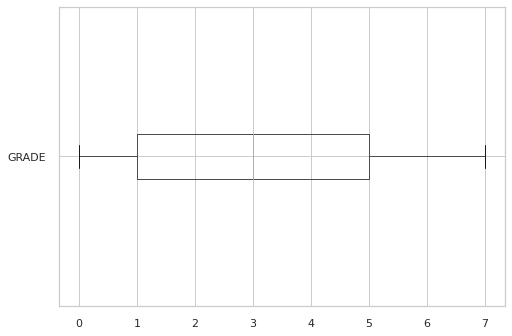

In [21]:
dstudent.boxplot(column=['GRADE'], vert = False)
plt.show()

>> O boxplot indica uma concentração maior de notas onde incide os menores valores, tendenciando os dados. Diante desse cenário, será aplicada a técnica de oversampling para igualar as menores notas em sentido quantitativo de elementos.

In [22]:
dstudent['GRADE'].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

In [23]:
## Balanceador

k_smt = KMeansSMOTE(kmeans_estimator=1, n_jobs=-1, random_state=42, cluster_balance_threshold=0)

In [24]:
dstudent_anon = dstudent.drop(labels=['GRADE'], axis=1)

dstudent_anon, dstudent_grade = k_smt.fit_resample(dstudent_anon, dstudent['GRADE'])
dstudent_balanced = pd.concat([dstudent_anon, dstudent_grade], axis=1)

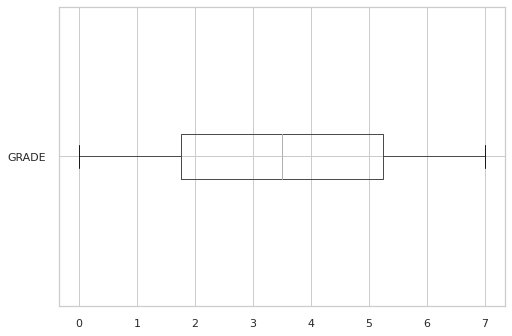

In [25]:
dstudent_balanced.boxplot(column=['GRADE'], vert = False)
plt.show()

>> Após a aplicação do oversampling aos dados, a mediana agora está localizada no centro, estando devidamente balanceada.

> **1 [C]** - Utilize a biblioteca AUTOML para fazer a previsão. Para o melhor algoritmo, teste 3 variações de um dos seus hiperparâmetros. <br>

> **1 [D]** - Para avaliar os resultados, utilize e explique a matriz de confusão. Além disso, escolha 2 métricas de sua preferência e o que o seu resultado significa. <br>

In [26]:
dstudent_x = dstudent_balanced.iloc[:, :-1].values
dstudent_y = dstudent_balanced.iloc[:, -1].values

(dstudent_x.shape, dstudent_y.shape)

((280, 30), (280,))

>> Definindo os dados de treinamento e teste.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dstudent_x, dstudent_y, test_size=0.33, random_state=42, stratify=dstudent_y)

In [219]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((187, 30), (187,)), ((93, 30), (93,)))

>>> Criando modelo do AUTOML settando configurações prévias.

In [ ]:
autosk = AutoSklearnClassifier(
    time_left_for_this_task=60 * (5),
    per_run_time_limit=20,
    resampling_strategy="cv",
    resampling_strategy_arguments={"folds": 10},
    n_jobs =-1
)

autosk.fit(X_train, y_train)
autosk.refit(X_train, y_train)

In [414]:
# Grava o modelo e seus respectivos hiperparâmetros

with open('predict-grade.pkl', 'wb')  as f:
    pickle.dump(autosk, f)

In [415]:
# Carrega o modelo e seus respectivos hiperparâmetros

with open('predict-grade.pkl', 'rb') as f:
    loaded_classifier = pickle.load(f)

In [422]:
y_true = y_test
y_pred = loaded_classifier.predict(X_test)

print("Melhor modelo de testes - Radom-forest")
print("")

print(f"Melhor acurácia: {accuracy_score(y_true, y_pred)}")

Melhor modelo de testes - Radom-forest

Melhor acurácia: 0.7956989247311828


>>> O melhor modelo escolhido pelo AUTOML foi Random Forest, com uma acurácia de 0.80, mas sofrendo variações pontuais devido seu random_state, variando de 0.70 a 0.80. Irei coletar os hiperparâmetros e aplicar nos modelos seguintes.

In [416]:
predictions = autosk.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predictions)}")
print("")

Acurácia: 0.7956989247311828



In [334]:
## Modelos testados pelo automatizador e seu respectivo rank, ensemble, type (modelo), cost e duration (tempo de execução) 

print(autosk.leaderboard())

          rank  ensemble_weight           type      cost   duration
model_id                                                           
2            1             0.02  random_forest  0.315508  17.334102
39           2             0.02            lda  0.331551   6.495830
32           3             0.44            sgd  0.427807   9.734589
59           4             0.02    extra_trees  0.433155  13.857466
49           5             0.02            qda  0.556150   9.404188
36           6             0.10       adaboost  0.631016  12.028801
62           7             0.38            sgd  0.631016  14.543917


In [252]:
## Métricas do melhor modelo escolhido pelo AUTOML

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.44      0.73      0.55        11
           2       0.89      0.67      0.76        12
           3       0.73      0.67      0.70        12
           4       0.91      0.83      0.87        12
           5       1.00      0.73      0.84        11
           6       0.92      0.92      0.92        12
           7       0.85      0.92      0.88        12

    accuracy                           0.80        93
   macro avg       0.83      0.80      0.80        93
weighted avg       0.83      0.80      0.80        93



>>> Hiperparâmetros do AUTOML

In [421]:
report = DataFrame(autosk.cv_results_).sort_values(by=["rank_test_scores"])

bestParams = report.loc[report.rank_test_scores == 1, "params"].squeeze()

dparams_items = bestParams.items()
dparams = pd.DataFrame(dparams_items)

dparams

,0,1
0,balancing:strategy,none
1,classifier:__choice__,random_forest
2,data_preprocessor:__choice__,feature_type
3,feature_preprocessor:__choice__,no_preprocessing
4,classifier:random_forest:bootstrap,True
5,classifier:random_forest:criterion,gini
6,classifier:random_forest:max_depth,None
7,classifier:random_forest:max_features,0.5
8,classifier:random_forest:max_leaf_nodes,None
9,classifier:random_forest:min_impurity_decrease,0.0


>>> Através desta tabela é possível coletar os hiperparâmetros utilizados no modelo do autosklearn. Como não há gerenciamento automático dessas condições, irei replica-los manualmente.

>>> Aplicando os teste em 3 modelos alterando seus hiperparâmetros.

In [401]:
## Melhores parâmetros do autosklearn

best_params = {
    "bootstrap": True,
    "criterion": "gini",
    "max_depth": None,
    "random_state": 42,
    "max_features": 0.5,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.00,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "min_weight_fraction_leaf": 0.00,
}

p = [best_params.copy(), best_params.copy(), best_params.copy()]

# Modelo 1
p[0].update({"max_features": 0.8})
# Modelo 2
p[1].update({"max_features": 0.9})
# Modelo 3
p[2].update({"max_features": 1.0})

rf = RandomForestClassifier(**best_params)

>>> Criando um dicionário com base nos hiperparâmetros dados pelo AUTOML.

In [432]:
## Modelo base

rf.fit(X_train, y_train)
predict = rf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predictions)}")
print(f"Precisão: {precision_score(y_test, predict, average='macro')}")

Acurácia: 0.7956989247311828
Precisão: 0.7439685314685316


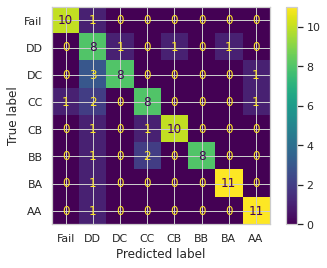

In [434]:
matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels = ["Fail", "DD", "DC", "CC", "CB", "BB", "BA", "AA"]).plot()
plt.show()

In [428]:
## Modelo 1

rf = RandomForestClassifier(**p[0])

rf.fit(X_train, y_train)
predict1 = rf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predict1)}")
print(f"Precisão: {precision_score(y_test, predict1 , average='macro')}")

Acurácia: 0.7526881720430108
Precisão: 0.7439685314685316


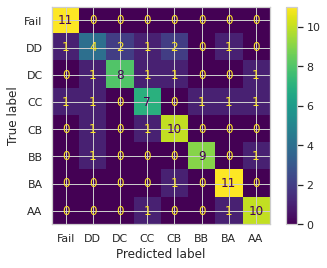

In [429]:
matrix1 = confusion_matrix(y_test, predict1)
ConfusionMatrixDisplay(confusion_matrix=matrix1, display_labels = ["Fail", "DD", "DC", "CC", "CB", "BB", "BA", "AA"]).plot()
plt.show()

In [407]:
## Modelo 2

rf = RandomForestClassifier(**p[1])

rf.fit(X_train, y_train)
predict2 = rf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predict2)}")
print(f"Precisão: {precision_score(y_test, predict2 , average='macro')}")

Acurácia: 0.7311827956989247
Precisão: 0.6947099775224775


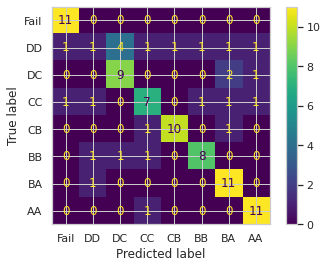

In [408]:
matrix2 = confusion_matrix(y_test, predict2)
ConfusionMatrixDisplay(confusion_matrix=matrix2, display_labels = ["Fail", "DD", "DC", "CC", "CB", "BB", "BA", "AA"]).plot()
plt.show()

In [409]:
## Modelo 3

rf = RandomForestClassifier(**p[2])

rf.fit(X_train, y_train)
predict3 = rf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predict3)}")
print(f"Precisão: {precision_score(y_test, predict3, average='macro')}")

Acurácia: 0.7311827956989247
Precisão: 0.7265890359640359


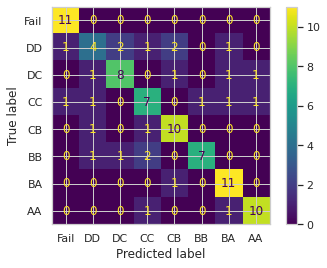

In [410]:
matrix3 = confusion_matrix(y_test, predict3)
ConfusionMatrixDisplay(confusion_matrix=matrix3, display_labels = ["Fail", "DD", "DC", "CC", "CB", "BB", "BA", "AA"]).plot()
plt.show()

>> ### Conclusões

Como foi dito anteriormente, o melhor modelo escolhido pelo AUTOML foi o **Random-Forest**, com uma acurácia de **0.80**. Devido ao **random_state** que é settado automaticamente, a acurácia sofre variações ao ser executado novamente na máquina, definido-se em um intervalo de **0.70** e **0.80** nos modelos de teste; através dessa condição é estabelecido um **random_state** padrão de **42** para uma melhor avaliação. <br>

Ao condicionar o **random_state** a permanecer em um valor fixo foi possível identificar de maneira mais concisa o comportamento na alteração dos hiperparâmetros, mas não ocorrendo nenhuma melhora significativa em relação ao **modelo base**. Dentre os 3 modelos testados, o **o modelo 1** foi o que chegou mais próximo do original com uma acurácia de **0.75** e uma sensibilidade de **0.74**. Em seguida, são avaliadas as matrizes de confusão, onde no modelo base é notada uma estabilidade de acertos entre as classes, com a menor taxa de acerto nas classes **"DD", "DC" e "CC"** de 72%, e no **modelo 1** há uma discrepância significativa, com apenas 36% acertos na classe **"DD"** e 63% para **"CC"**. <br>

É concluído que de fato o Random Forest é um bom modelo para o contexto e a definição de um random state torna mais estável o desenvolvimento, mas não ocorrendo maiores alterações nos resultados nas mudanças dos seus hiperparâmetros.



**2 -** Utilize a mesma base de dados (lembrem de tirar o rótulo, obviamente) da questão anterior de forma que:

> **2 [A]** - Execute o K-means e Hierárquico. <br>

> **2 [B]** - Teste o K igual à 5 e 7. <br>

>> O método de avaliação aplicado no dataset foi **Silhouette Score**. A distância é calculada através de uma média entre a localização de uma amostra e os demais pontos de um mesmo cluster e a media entre uma amostra e todos os pontos de cluster mais próximos. <br>

>> A variação de retorno é entre -1 e 1. Para valores mais próximos de -1 há uma clusterização incorreta, para os mesmo próximos de 1 há uma clusterização correta. Valores próximos de 0 indicam sobreposição e mais próximos de 1 um melhor agrupamento.

In [82]:
# Normalizando dados

dstudent_cluster = dstudent_balanced.copy()
dstudent_cluster = dstudent_cluster.drop(["GRADE"], axis = 1)

X = RobustScaler().fit_transform(dstudent_cluster)

>>> K-Means [K - 5 / 7]

In [ ]:
k5 = KMeans(n_clusters=5, random_state=42)
k5.fit(X)

k7 = KMeans(n_clusters=7, random_state=42)
k7.fit(X)

In [84]:
print(f"K-Means com K = 5: {silhouette_score(X, k5.labels_)}")
print(f"K-Means com K = 5: {silhouette_score(X, k7.labels_)}")

K-Means com K = 5: 0.12577037778328456
K-Means com K = 5: 0.12986475047535537


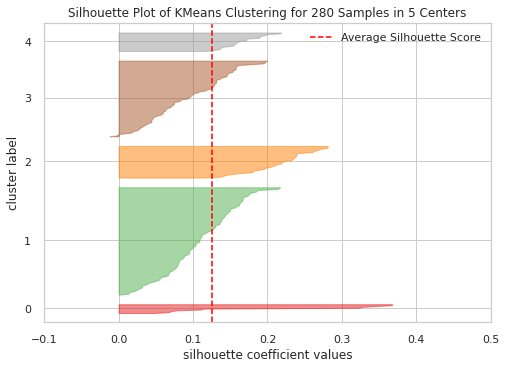

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 280 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [85]:
visualizer5 = SilhouetteVisualizer(k5)
visualizer5.fit(X)
visualizer5.show() 

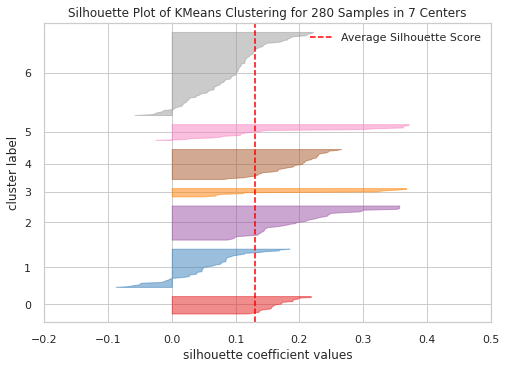

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 280 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [86]:
visualizer7 = SilhouetteVisualizer(k7)
visualizer7.fit(X)
visualizer7.show() 

>>> Hierárquico [K - 5 / 7] <br>

>>> Por padrão o método de linkage é **ward**

In [ ]:
## K - 5 / 7

ac7 = AgglomerativeClustering(n_clusters=7)
ac7.fit(X)

ac5 = AgglomerativeClustering(n_clusters=5)
ac5.fit(X)

In [88]:
print(f"Hierárquico com K = 5: {silhouette_score(X, ac5.labels_)}")
print(f"Hierárquico com K = 7: {silhouette_score(X, ac7.labels_)}")

Hierárquico com K = 5: 0.12652404815115845
Hierárquico com K = 7: 0.125404222422233


> **2 [C]** - Na execução do Hierárquico, varie 2 métodos do linkage. <br>

>> Hierárquico - Método de linkage **[Average]**

In [ ]:
## K - 5 / 7 [Average]

ac7_av = AgglomerativeClustering(n_clusters=7, linkage = "average")
ac7_av.fit(X)

ac5_av = AgglomerativeClustering(n_clusters=5, linkage = "average")
ac5_av.fit(X)

In [90]:
print(f"Hierárquico [Average] com K = 5: {silhouette_score(X, ac5_av.labels_)}")
print(f"Hierárquico [Average] com K = 7: {silhouette_score(X, ac7_av.labels_)}")

Hierárquico [Average] com K = 5: 0.426830076390655
Hierárquico [Average] com K = 7: 0.24756339809718478


>> Hierárquico - Método de linkage **[Single]**

In [ ]:
## K - 5 / 7 [Single]

ac7_s = AgglomerativeClustering(n_clusters=7, linkage = "single")
ac7_s.fit(X)

ac5_s = AgglomerativeClustering(n_clusters=5, linkage = "single")
ac5_s.fit(X)

In [95]:
print(f"Hierárquico [Single] com K = 5: {silhouette_score(X, ac5_s.labels_)}")
print(f"Hierárquico [Single] com K = 7: {silhouette_score(X, ac7_s.labels_)}")

Hierárquico [Single] com K = 5: 0.29653433254463424
Hierárquico [Single] com K = 7: 0.30163720952464435


> **2 [D]** - Por fim, faça uma comparação entre os 2 resultados das execuções anteriores e adote uma medida de avaliação própria para clusterização. <br>

>> Dentre inúmeros modelos de clustering, o hierárquico possui caráter flexível através da produção de clusters que variam de **1** (todo dataset) à **n** (a variação é seu próprio cluster), se tornando cada vez mais similares. <br> <br> No primeiro modelo gerado com seus parâmetros defaults com critério de linkage **ward** e definindo os valores de clusters para **5** e **7**, são obtidos através do método de avaliação **Silhouette Score** valores próximos de **0**, mas não negativos; essa condição retorna que o critério utilizado que visa minimizar a variância dos clusters mesclados não é o mais ideal, mas ainda existindo a possibilidade de agrupamento. <br> <br> Ao condicionar o dataset a outros métodos de linkage, **single** e **average**, foi possível obter melhores valores na silhueta, com uma melhor para **0.43** através da ligação **average** e **K = 5**. <br> <br> O **single** também condicionou uma melhora significativa em relação ao **ward**. <br> <br> Diante de todos os testes executados, através do **Silhouette Score** foi possível identificar que o melhor resultado foi concentrado no método hierárquico de **Agglomerative Clustering**, com **K = 5**, **Linkage = Average**, retornando um valor considerável de **0.43**.

**BÔNUS** - Diga vantagens e desvantagens do uso do AUTOML e como você faria para usá-lo, garantindo os melhores resultados possíveis. <br>

> O AUTOML promove uma rápida identificação de modelos que podem ser aplicados em contextos de data, possibilitando a visualização rápida de possíveis resultados. Contudo, não se caracteriza como uma boa prática a longo prazo, visto que não é interessante para um indivíduo cientista ou engenheiro de dados estar trabalhando com uma black box, pois essa automação se estabelece no uso heurístico onde as informações não são claras. <br> <br> Não há, também, cobertura generalizada para todos os contextos, como domínio dos dados para modelagem. Como também não pode ser paralelizado, gerando perdas de possibilidade para explorar inúmeros ambientes de busca ao mesmo tempo. <br> <br> Concluo que o AUTOML se estabelece em um cenário que ainda há a necessidade de supervisão humana, de interpretação de contexto e a necessidade de mensurar pequenas características atreladas ao mundo dos dados, necessitando de uma visão do comportamento do automatizador, mas ainda possuindo seu espaço dentro do mundo de Machine Learning. :)

***

In [96]:
#!pip3 install math
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install seaborn
#!pip3 install statistics 
#!pip3 install sklearn
#!pip3 install yellowbrick